**Tugas Besar IF2220 Probabilitas dan Statistika** 
**Penarikan Kesimpulan dan Pengujian Hipotesis**


In [523]:
#setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as s
import seaborn as sns
import math

def zscore(x, mean, std, n):
  return (x-mean)*math.sqrt(n)/std
def ptoz(p):
  return s.norm.ppf(p)
def ztop(z):
  return s.norm.cdf(z)
def ztwotestmean(d0, x1, x2, var1, var2, n1, n2):
  return((x1 - x2) - d0)/math.sqrt((var1/n1) + (var2/n2))

alpha = 0.05 #nilai alpha
colnames = ['id', 'daerah', 'sumbu utama', 'sumbu kecil', 'keunikan', 'area bulatan', 'diameter', 'kadar air', 'keliling', 'bulatan', 'ransum', 'kelas']
url = 'https://drive.google.com/file/d/1z0EyNb2c5PD-ECNgsS_6f7KV6bm2ya10/view?usp=sharing' # copy of original dataset, in personal drive
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
g = pd.read_csv(path, header=None)
g.columns = colnames
gandum = g[g.columns[1:11]] #dataset selain kolom id dan kelas

# **Descriptive Statistics**

## Mean

---



In [524]:
gandum.mean() #mean untuk kolom daerah-ransum

daerah          4801.246000
sumbu utama      116.045171
sumbu kecil       53.715246
keunikan           0.878764
area bulatan    4937.048000
diameter          77.771158
kadar air          0.648372
keliling         281.479722
bulatan            0.761737
ransum             2.150915
dtype: float64

## Median

---



In [525]:
gandum.median() #median untuk kolom daerah-ransum

daerah          4735.000000
sumbu utama      115.405140
sumbu kecil       53.731199
keunikan           0.890045
area bulatan    4857.000000
diameter          77.645277
kadar air          0.626117
keliling         280.045500
bulatan            0.761288
ransum             2.193599
dtype: float64

## Modus

---



In [526]:
for i in gandum.columns:
  mod = gandum[i].mode()
  print("Modus " + i + ": ", end="")
  if(len(mod) != 500): #jika tidak semua modus
    for j in range(len(mod)):
      if j != len(mod) -1:
        print(mod[j], end= ", ")
      else:
        print(mod[j])
  else:
    print("Semua data muncul sekali") #semua data unik, semua modus
  print()

Modus daerah: 3992, 4881, 5642, 6083

Modus sumbu utama: Semua data muncul sekali

Modus sumbu kecil: Semua data muncul sekali

Modus keunikan: Semua data muncul sekali

Modus area bulatan: 3802, 4913

Modus diameter: 71.29356396, 78.83325579, 84.75622403, 88.00634154

Modus kadar air: 0.735849057, 0.824404762

Modus keliling: Semua data muncul sekali

Modus bulatan: Semua data muncul sekali

Modus ransum: Semua data muncul sekali



## Standar Deviasi

---



In [527]:
gandum.std() #standar deviasi untuk kolom daerah-ransum

daerah           986.395491
sumbu utama       18.282626
sumbu kecil        4.071075
keunikan           0.036586
area bulatan    1011.696255
diameter           8.056867
kadar air          0.094367
keliling          37.335402
bulatan            0.061702
ransum             0.249767
dtype: float64

## Variansi

---



In [528]:
gandum.var() # variansi untuk kolom daerah-ransum

daerah          9.729761e+05
sumbu utama     3.342544e+02
sumbu kecil     1.657365e+01
keunikan        1.338528e-03
area bulatan    1.023529e+06
diameter        6.491311e+01
kadar air       8.905149e-03
keliling        1.393932e+03
bulatan         3.807194e-03
ransum          6.238350e-02
dtype: float64

## Range

---



In [529]:
gandum.max() - gandum.min() #range untuk kolom daerah-ransum

daerah          4931.000000
sumbu utama      153.795469
sumbu kecil       29.071182
keunikan           0.194085
area bulatan    5141.000000
diameter          40.747172
kadar air          0.468972
keliling         291.822000
bulatan            0.730158
ransum             1.024013
dtype: float64

## Min

---



In [530]:
gandum.min() #nilai mininum untuk kolom daerah-ransum

daerah          2522.000000
sumbu utama       74.133114
sumbu kecil       39.906517
keunikan           0.719916
area bulatan    2579.000000
diameter          56.666658
kadar air          0.409927
keliling         197.015000
bulatan            0.174590
ransum             1.440796
dtype: float64

## Max

---



In [531]:
gandum.max() #nilai maksimum untuk kolom daerah-ransum

daerah          7453.000000
sumbu utama      227.928583
sumbu kecil       68.977700
keunikan           0.914001
area bulatan    7720.000000
diameter          97.413830
kadar air          0.878899
keliling         488.837000
bulatan            0.904748
ransum             2.464809
dtype: float64

## Kuartil

---



In [532]:
gandum.quantile([0.25,0.5,0.75]) #kuartil (quantil 0.25, 0.5, 0.75) untuk kolom daerah-ransum

daerah  sumbu utama  sumbu kecil  ...  keliling   bulatan    ransum
0.25  4042.75   104.116098    51.193576  ...  255.8830  0.731991  1.983939
0.50  4735.00   115.405140    53.731199  ...  280.0455  0.761288  2.193599
0.75  5495.50   129.046792    56.325158  ...  306.0625  0.796361  2.381612

[3 rows x 10 columns]

## IQR

---



In [533]:
gandum.quantile(0.75) - gandum.quantile(0.25) #IQR untuk kolom daerah-ransum

daerah          1452.750000
sumbu utama       24.930694
sumbu kecil        5.131582
keunikan           0.043902
area bulatan    1484.000000
diameter          11.903290
kadar air          0.154001
keliling          50.179500
bulatan            0.064370
ransum             0.397673
dtype: float64

## Skewness

---



In [534]:
gandum.skew() #Skew untuk kolom daerah-ransum

daerah          0.238144
sumbu utama     0.761529
sumbu kecil    -0.010828
keunikan       -1.623472
area bulatan    0.257560
diameter        0.002725
kadar air       0.493661
keliling        0.733627
bulatan        -3.599237
ransum         -0.658188
dtype: float64

## Kurtosis

---



In [535]:
gandum.kurtosis() # Kurtosis untuk kolom daerah-ransum

daerah          -0.434631
sumbu utama      4.330534
sumbu kecil      0.475568
keunikan         2.917256
area bulatan    -0.409685
diameter        -0.466455
kadar air       -0.740326
keliling         2.272685
bulatan         29.975096
ransum          -0.428656
dtype: float64

# **Visualisasi**

In [536]:
fig, axes = plt.subplots(nrows = 5, ncols=2, figsize=(14,20))
row = 0
for i, col in enumerate(gandum.columns):
  gandum.boxplot(column=col, ax=axes[row, i%2])
  if i % 2 == 1:
    row += 1
plt.show()
#Menunjukkan boxplot untuk kolom daerah - ransum

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5570137f10>,
      dtype=object)

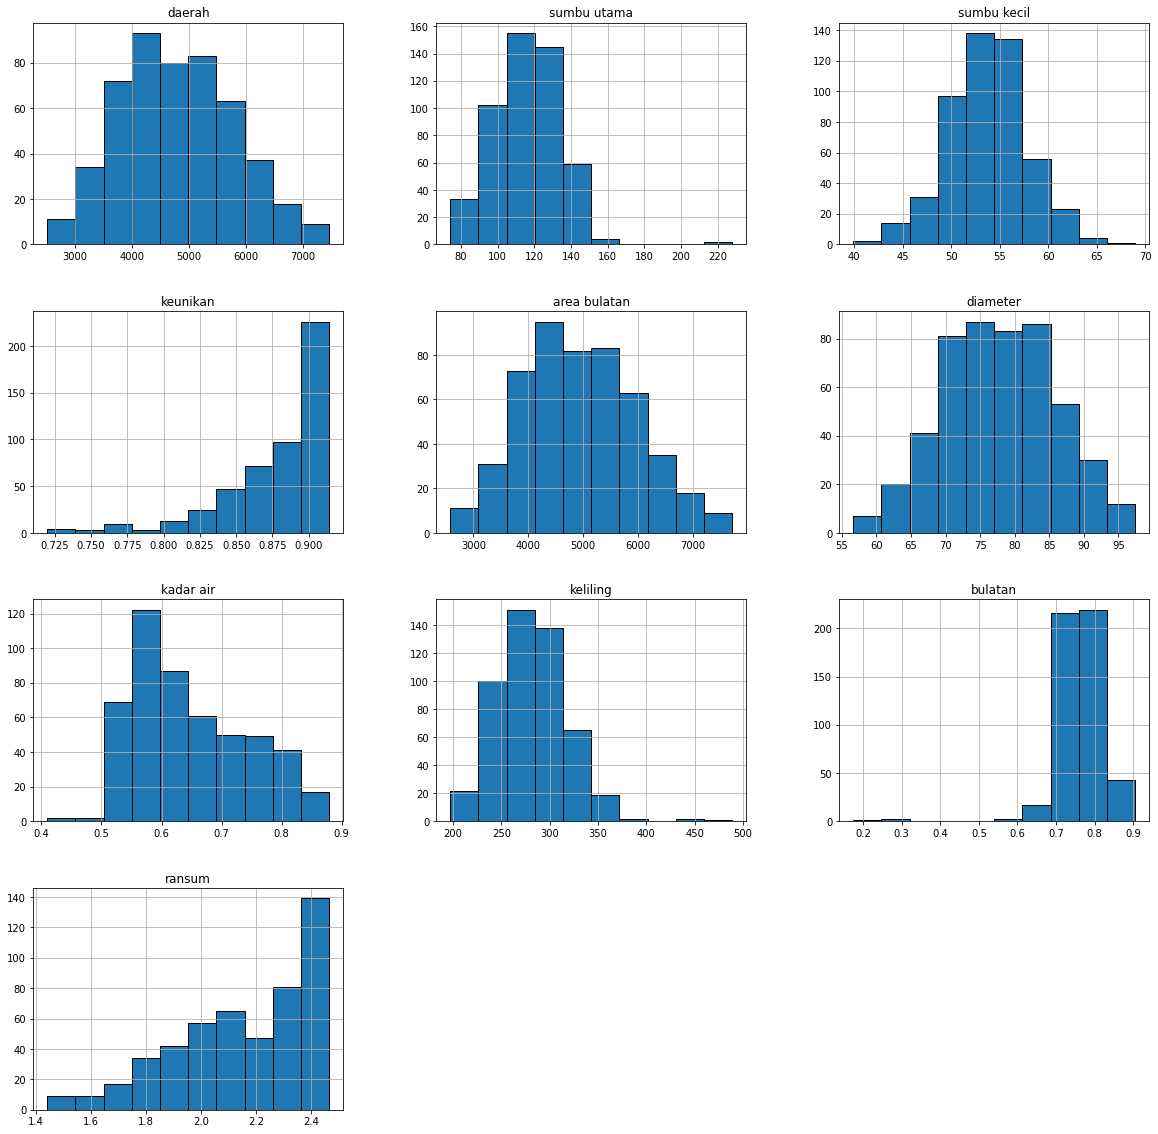

In [537]:
gandum.hist(figsize=(20, 20), edgecolor='black')
#Menunjukkan histogram untuk kolom daerah - ransum

## Daerah

---



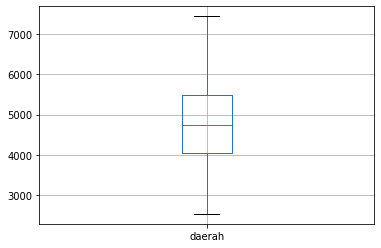

In [538]:
df = pd.DataFrame(data = gandum, columns = ['daerah'])
boxplot = df.boxplot(column = ['daerah'])

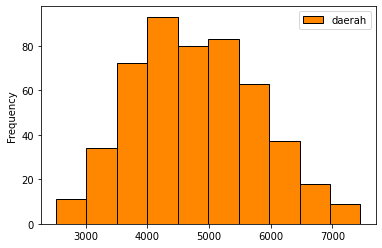

In [539]:
df = pd.DataFrame(data = gandum, columns = ['daerah'])
hist = df.plot.hist(bins = 10, color = '#FF8700', edgecolor='black')

Uraian:

Tidak terdapat outlier pada boxplot karena tidak ada nilai yang kurang dari Q1 - 1.5*IQR dan lebih dari Q3 + 1.5 * 1452.75

Lower tail menandakan nilai Q1 - 1.5*IQR dan Upper tail menandakan nilai Q3 + 1.5*IQR. Posisi kedua tail sesuai karena berdasarkan perhitungan lower tail : 2179.125 dan upper tail 7674.625

Pada box ditunjukkan Q1, Q2, Q3. Q1 adalah bagian bawah dari box, Q2 adalah bagian tengah dan juga median, Q3 adalah bagian atas dari box. Posisi ketiga kuartil sesuai karena Q1: 4042.75, Q2: 4735, Q3: 5495.50. Jarak antara Bagian atas dan bagian bawah adalah nilai IQR. 


Histogram memiliki positive skew karena memiliki kecendrungan ke kiri. memiliki tipe kurtosis platykurtic karena bentuknya lebih lebar dari histogram yang berdistribusi normal.



## Sumbu Utama

---



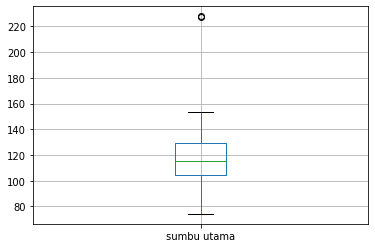

In [540]:
df = pd.DataFrame(data = gandum, columns = ['sumbu utama'])
boxplot = df.boxplot(column = ['sumbu utama'])

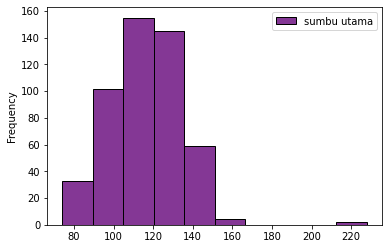

In [541]:
df = pd.DataFrame(data = gandum, columns = ['sumbu utama'])
hist = df.plot.hist(bins = 10, color = '#843795', edgecolor='black')

Uraian:

Terdapat outlier pada boxplot hal ini dapat dibuktikan dengan adanya nilai max 227.928583 yang melebihi Upper tail : Q3 + 1.5*IQR = 166.442833

Lower tail menandakan nilai Q1 - 1.5*IQR dan Upper tail menandakan nilai Q3 + 1.5*IQR. Posisi kedua tail sesuai karena berdasarkan perhitungan lower tail :  66.720058 dan upper tail 166.442833

Pada box ditunjukkan Q1, Q2, Q3. Q1 adalah bagian bawah dari box, Q2 adalah bagian tengah dan juga median, Q3 adalah bagian atas dari box. Posisi ketiga kuartil sesuai karena Q1: 104.116098, Q2: 115.405140, Q3: 129.046792. Jarak antara Bagian atas dan bagian bawah adalah nilai IQR. 

Histogram memiliki positive skew karena memiliki kecendrungan ke kiri. Memiliki tipe kurtosis leptokurtic karena bentuknya lebih ramping dari histogram yang berdistribusi normal. Terdapat outlier di ujung kanan

## Sumbu Kecil


---



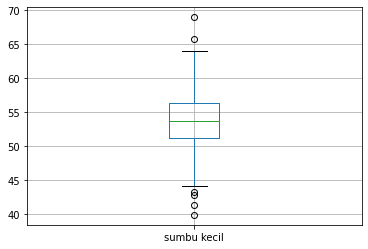

In [542]:
df = pd.DataFrame(data = gandum, columns = ['sumbu kecil'])
boxplot = df.boxplot(column = ['sumbu kecil'])

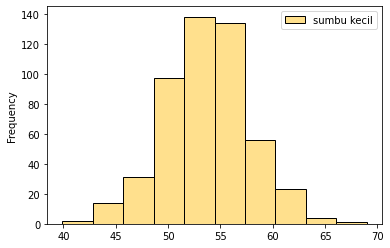

In [543]:
df = pd.DataFrame(data = gandum, columns = ['sumbu kecil'])
hist = df.plot.hist(bins = 10, color = '#ffe08d', edgecolor='black')

Uraian:
Terdapat outlier pada boxplot hal ini dapat dibuktikan dengan adanya nilai max dan min yang lebih dari upper dan kurang dari lower tail.


Lower tail menandakan nilai Q1 - 1.5*IQR dan Upper tail menandakan nilai Q3 + 1.5*IQR. Posisi kedua tail sesuai karena berdasarkan perhitungan lower tail : 43.496203 dan upper tail : 64.022531

Pada box ditunjukkan Q1, Q2, Q3. Q1 adalah bagian bawah dari box, Q2 adalah bagian tengah dan juga median, Q3 adalah bagian atas dari box. Posisi ketiga kuartil sesuai karena Q1: 51.193576, Q2: 53.731199, Q3: 56.325158 . Jarak antara Bagian atas dan bagian bawah adalah nilai IQR. 

Histogram memiliki skew mendekati 0. Memiliki kurtosis mesokurtic karena nilai kurtosis mendekati 0. Histogram menyerupai bell curve dan kolom sumbu kecil dapat dianggap berdistribusi normal karena memiliki nilai skew dan kurtosis yang mendekati 0 (di pandas, kurtosis normal bernilai 0).


## Keunikan


---



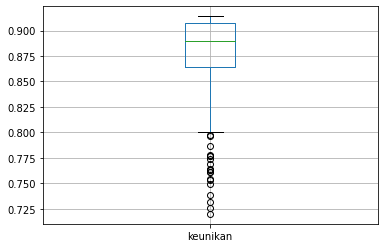

In [544]:
df = pd.DataFrame(data = gandum, columns = ['keunikan'])
boxplot = df.boxplot(column = ['keunikan'])

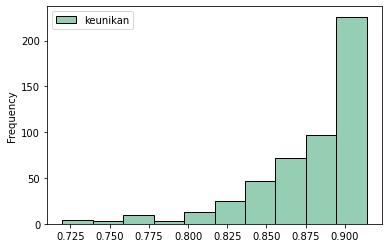

In [545]:
df = pd.DataFrame(data = gandum, columns = ['keunikan'])
hist = df.plot.hist(bins = 10, color = '#96ceb4', edgecolor='black')

Uraian:

Terdapat outlier pada boxplot hal ini dapat dibuktikan dengan adanya nilai min yang kurang dari lower tail

Lower tail menandakan nilai Q1 - 1.5*IQR dan Upper tail menandakan nilai Q3 + 1.5*IQR. Posisi kedua tail sesuai karena berdasarkan perhitungan lower tail : 0.797823 dan upper tail : 0.973431

Pada box ditunjukkan Q1, Q2, Q3. Q1 adalah bagian bawah dari box, Q2 adalah bagian tengah dan juga median, Q3 adalah bagian atas dari box. Posisi ketiga kuartil sesuai karena Q1: 0.863676, Q2: 0.890045, Q3:  0.907578. Jarak antara Bagian atas dan bagian bawah adalah nilai IQR.

Histogram memiliki negative skew. Memiliki kurtosis leptokurtic karena bentuknya lebih ramping dari histogram yang berdistribusi normal.

## Area Bulatan

---



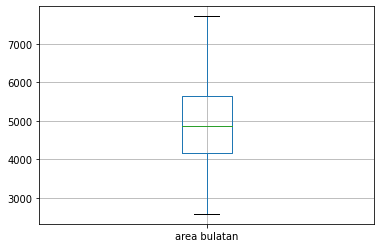

In [546]:
df = pd.DataFrame(data = gandum, columns = ['area bulatan'])
boxplot = df.boxplot(column = ['area bulatan'])

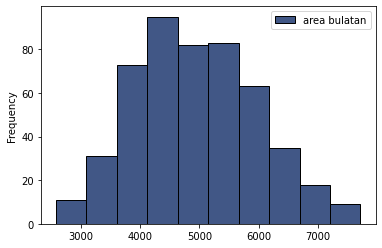

In [547]:
df = pd.DataFrame(data = gandum, columns = ['area bulatan'])
hist = df.plot.hist(bins = 10, color = '#415786', edgecolor='black')

Uraian:

Tidak terdapat outlier pada boxplot

Lower tail menandakan nilai Q1 - 1.5*IQR dan Upper tail menandakan nilai Q3 + 1.5*IQR. Posisi kedua tail sesuai karena berdasarkan perhitungan lower tail : 
2,686.25 dan upper tail : 7,138.25

Pada box ditunjukkan Q1, Q2, Q3. Q1 adalah bagian bawah dari box, Q2 adalah bagian tengah dan juga median, Q3 adalah bagian atas dari box. Posisi ketiga kuartil sesuai karena Q1: 4170.25, Q2:  4857.00 , Q3:  5654.25. Jarak antara Bagian atas dan bagian bawah adalah nilai IQR. 

Histogram memiliki positive skew. Memiliki kurtosis platykurtic karena bentuknya lebih lebar dari histogram yang berdistribusi normal.



## Diameter


---



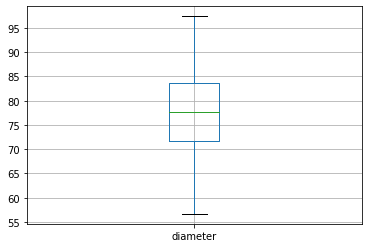

In [548]:
df = pd.DataFrame(data = gandum, columns = ['diameter'])
boxplot = df.boxplot(column = ['diameter'])

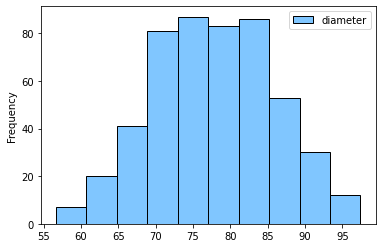

In [549]:
df = pd.DataFrame(data = gandum, columns = ['diameter'])
hist = df.plot.hist(bins = 10, color = '#80C6FF', edgecolor='black')

Uraian:

Tidak terdapat outlier

Lower tail menandakan nilai Q1 - 1.5*IQR dan Upper tail menandakan nilai Q3 + 1.5*IQR. Posisi kedua tail sesuai karena berdasarkan perhitungan lower tail : 
53.890373 dan upper tail : 101.503533

Pada box ditunjukkan Q1, Q2, Q3. Q1 adalah bagian bawah dari box, Q2 adalah bagian tengah dan juga median, Q3 adalah bagian atas dari box. Posisi ketiga kuartil sesuai karena Q1: 71.745308, Q2: 77.645277, Q3:  83.648598. Jarak antara Bagian atas dan bagian bawah adalah nilai IQR. 

Histogram memiliki skew mendekati 0. Memiliki kurtosis 
mesokurtic karena nilai kurtosis mendekati 0. Histogram juga menyerupai bell curve. Kolom diameter dapat dianggap berdistribusi normal karena nilai skew dan kurtosis yang mendekati 0 (di pandas, kurtosis normal itu 0).


## Kadar Air

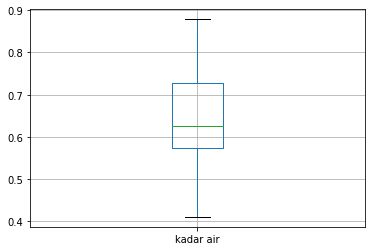

In [550]:
df = pd.DataFrame(data = gandum, columns = ['kadar air'])
boxplot = df.boxplot(column = ['kadar air'])

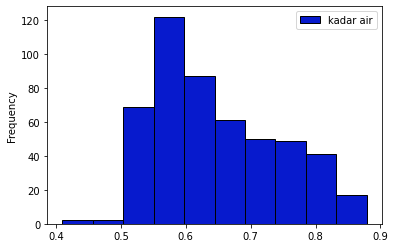

In [551]:
df = pd.DataFrame(data = gandum, columns = ['kadar air'])
hist = df.plot.hist(bins = 10, color = '#071ACD', edgecolor='black')

Uraian:

Tidak ada outlier 

Lower tail menandakan nilai Q1 - 1.5*IQR dan Upper tail menandakan nilai Q3 + 1.5*IQR. Posisi kedua tail sesuai karena berdasarkan perhitungan lower tail :0.3416305  dan upper tail : 0.9576345

Pada box ditunjukkan Q1, Q2, Q3. Q1 adalah bagian bawah dari box, Q2 adalah bagian tengah dan juga median, Q3 adalah bagian atas dari box. Posisi ketiga kuartil sesuai karena Q1: 0.572632, Q2: 0.626117, Q3: 0.726633. Jarak antara Bagian atas dan bagian bawah adalah nilai IQR. 

Histogram memiliki positive skew. Memiliki kurtosis platykurtic karena bentuknya lebih lebar dari histogram yang berdistribusi normal.

## Keliling


---



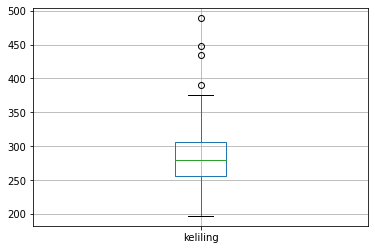

In [552]:
df = pd.DataFrame(data = gandum, columns = ['keliling'])
boxplot = df.boxplot(column = ['keliling'])

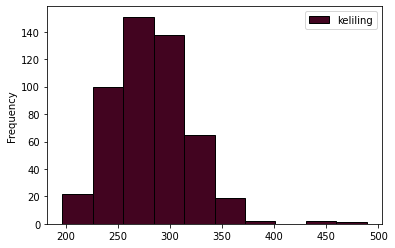

In [553]:
df = pd.DataFrame(data = gandum, columns = ['keliling'])
hist = df.plot.hist(bins = 10, color = '#420420', edgecolor='black')

Uraian:

Terdapat outlier pada boxplot hal ini dapat dibuktikan dengan adanya nilai yang lebih besar dari upper tail

Lower tail menandakan nilai Q1 - 1.5*IQR dan Upper tail menandakan nilai Q3 + 1.5*IQR. Posisi kedua tail sesuai karena berdasarkan perhitungan lower tail :  180.61375 dan upper tail : 381.33175

Pada box ditunjukkan Q1, Q2, Q3. Q1 adalah bagian bawah dari box, Q2 adalah bagian tengah dan juga median, Q3 adalah bagian atas dari box. Posisi ketiga kuartil sesuai karena Q1: 255.8830, Q2: 280.0455, Q3: 306.0625. Jarak antara Bagian atas dan bagian bawah adalah nilai IQR. 

Histogram memiliki negative skew. Memiliki kurtosis leptokurtic karena bentuknya lebih ramping dari histogram yang berdistribusi normal. Terdapat outlier pada histogram.


## Bulatan

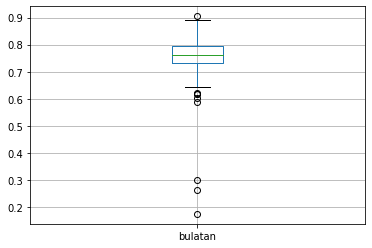

In [554]:
df = pd.DataFrame(data = gandum, columns = ['bulatan'])
boxplot = df.boxplot(column = ['bulatan'])

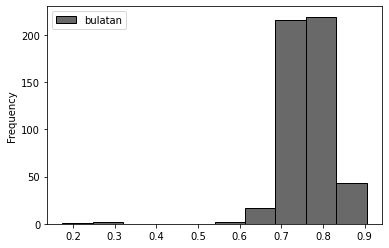

In [555]:
df = pd.DataFrame(data = gandum, columns = ['bulatan'])
hist = df.plot.hist(bins = 10, color = '#696969', edgecolor='black')

Uraian:

Terdapat outlier pada boxplot. Hal ini dapat dibuktikan dengan adanya nilai max dan min yang lebih dari upper tail dan kurang dari lower tail

Lower tail menandakan nilai Q1 - 1.5*IQR dan Upper tail menandakan nilai Q3 + 1.5*IQR. Posisi kedua tail sesuai karena berdasarkan perhitungan lower tail :  0.635436 dan upper tail : 0.892916

Pada box ditunjukkan Q1, Q2, Q3. Q1 adalah bagian bawah dari box, Q2 adalah bagian tengah dan juga median, Q3 adalah bagian atas dari box. Posisi ketiga kuartil sesuai karena Q1: 0.731991, Q2: 0.761288, Q3: 0.796361. Jarak antara Bagian atas dan bagian bawah adalah nilai IQR. 


Histogram negative skew. Memiliki kurtosis 
leptokurtic karena bentuknya lebih ramping dari histogram yang berdistribusi normal
. Terdapat outlier pada histogram

## Ransum

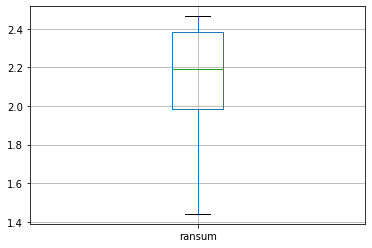

In [556]:
df = pd.DataFrame(data = gandum, columns = ['ransum'])
boxplot = df.boxplot(column = ['ransum'])

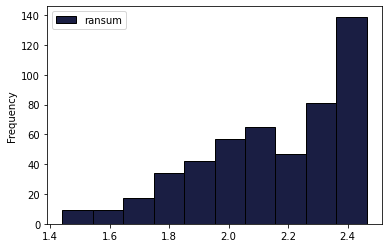

In [557]:
df = pd.DataFrame(data = gandum, columns = ['ransum'])
hist = df.plot.hist(bins = 10, color = '#1A1E43', edgecolor='black')

Uraian:

Tidak terdapat outlier pada boxplot

Lower tail menandakan nilai Q1 - 1.5*IQR dan Upper tail menandakan nilai Q3 + 1.5*IQR. Posisi kedua tail sesuai karena berdasarkan perhitungan lower tail : 1.3874295 dan upper tail : 2.9781215

Pada box ditunjukkan Q1, Q2, Q3. Q1 adalah bagian bawah dari box, Q2 adalah bagian tengah dan juga median, Q3 adalah bagian atas dari box. Posisi ketiga kuartil sesuai karena Q1: 1.983939, Q2: 2.193599, Q3:  2.381612. Jarak antara Bagian atas dan bagian bawah adalah nilai IQR. 

Histogram negative skew. Memiliki kurtosis platykurtic karena bentuknya lebih lebar dari histogram yang berdistribusi normal. 

# **Normality Test**

Daerah
---

In [558]:
df = pd.DataFrame(data = gandum, columns = ['daerah'])
stat, p = s.shapiro(df) #shapiro wilks
print("p = {:g}".format(p))
if p <= alpha: #jika p value dibawah atau sama dengan alpha, maka tidak berdistribusi normal
    print("Tidak berdistribusi normal")
else:
    print("Berdistribusi normal")

p = 0.0032707
Tidak berdistribusi normal


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


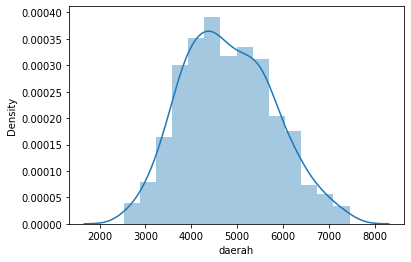

In [559]:
sns.distplot(gandum['daerah'])

Penjelasan : 
Kolom daerah melalui normality test shapiro-wilks mendapatkan p-value sebesar 0.00327 yang lebih kecil dari nilai alpha 0.05 sehingga tidak bisa dianggap berdistribusi normal. Dari histogram juga terlihat bahwa distribusi data daerah tidak berbentuk bell curve.

Sumbu Utama
---

In [560]:
df = pd.DataFrame(data = gandum, columns = ['sumbu utama'])
stat, p = s.shapiro(df) #shapiro wilks
print("p = {:g}".format(p))
if p <= alpha:  #jika p value dibawah atau sama dengan alpha, maka tidak berdistribusi normal
    print("Tidak berdistribusi normal")
else:
    print("Berdistribusi normal")

p = 9.2362e-12
Tidak berdistribusi normal


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


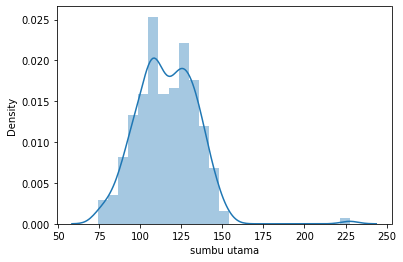

In [561]:
sns.distplot(gandum['sumbu utama'])

Penjelasan:
Dari normality test shapiro-wilks, kolom sumbu utama mendapatkan p-value bernilai 9.2362e-12 yang jauh dibawah nilai alpha 0.05. Jadi kolom sumbu utama tidak berdistribusi normal. Dari histogram juga bisa dilihat distribusi data kolom sumbu utama yang bentuknya beda jauh dari bell curve.

Sumbu Kecil
---

In [562]:
df = pd.DataFrame(data = gandum, columns = ['sumbu kecil'])
stat, p = s.shapiro(df) #shapiro wilks
print("p = {:g}".format(p))
if p <= alpha:  #jika p value dibawah atau sama dengan alpha, maka tidak berdistribusi normal
    print("Tidak berdistribusi normal")
else:
    print("Berdistribusi normal")

p = 0.423456
Berdistribusi normal


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


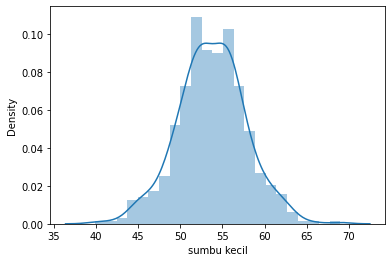

In [563]:
sns.distplot(gandum['sumbu kecil'])

Penjelasan: 
Dari normality test shapiro-wilks, kolom sumbu kecil mendapatkan nilai 0.423456 yang jauh di atas nilai alpha 0.05. Dari ini dapat disimpulkan kolom sumbu kecil berdistribusi normal. Dapat dilihat juga dari histogramnya bahwa distribusi data di di kolom sumbu kecil menyerupai bell curve yang merupakan penanda bahwa berdistribusi normal.

Keunikan
---

In [564]:
df = pd.DataFrame(data = gandum, columns = ['keunikan'])
stat, p = s.shapiro(df) #shapiro wilks
print("p = {:g}".format(p))
if p <= alpha:  #jika p value dibawah atau sama dengan alpha, maka tidak berdistribusi normal
    print("Tidak berdistribusi normal")
else:
    print("Berdistribusi normal")

p = 1.31517e-22
Tidak berdistribusi normal


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


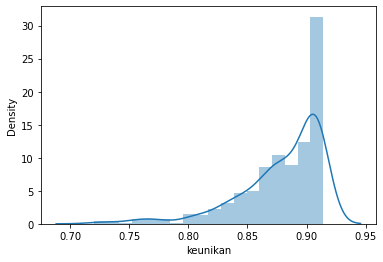

In [565]:
sns.distplot(gandum['keunikan'])

Penjelasan: 
Dari normality test shapiro-wilks, didapatkan p-value bernilai 1.31517e-22 yang jauh dibawah nilai alpha 0.05 sehingga dapat disimpulkan kolom keunikan tidak berdistribusi normal. Dari histogram juga dapat dilihat bahwa distribusinya tidak berbentuk bell curve.

Area Bulatan
---

In [566]:
df = pd.DataFrame(data = gandum, columns = ['area bulatan'])
stat, p = s.shapiro(df) #shapiro wilks
print("p = {:g}".format(p))
if p <= alpha:  #jika p value dibawah atau sama dengan alpha, maka tidak berdistribusi normal
    print("Tidak berdistribusi normal")
else:
    print("Berdistribusi normal")

p = 0.00248471
Tidak berdistribusi normal


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


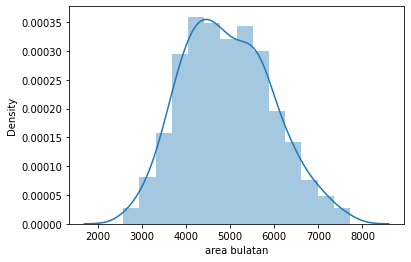

In [567]:
sns.distplot(gandum['area bulatan'])

Penjelasan: 
Dari normality test shapiro-wilks, didapatkan p-value sebesar 0.00248 yang berada dibawah nilai alpha 0.05 sehingga dapat disimpulkan kolom area bulatan tidak berdistribusi normal. Dari histogram pun dapat dilihat bahwa distribusinya tidak berbentuk bell curve.

Diameter
---

In [568]:
df = pd.DataFrame(data = gandum, columns = ['diameter'])
stat, p = s.shapiro(df) #shapiro wilks
print("p = {:g}".format(p))
if p <= alpha:  #jika p value dibawah atau sama dengan alpha, maka tidak berdistribusi normal
    print("Tidak berdistribusi normal")
else:
    print("Berdistribusi normal")

p = 0.118345
Berdistribusi normal


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


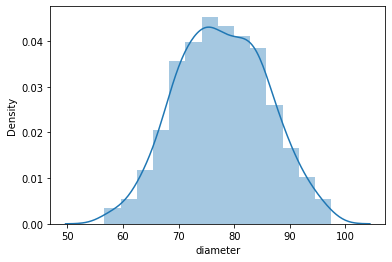

In [569]:
sns.distplot(gandum['diameter'])

Penjelasan: 
Dari normality test shapiro-wilks, didapatkan nilai p-value 0.1118345 yang lebih dari nilai alpha 0.05 sehingga dapat disimpulkan kolom diameter berdistribusi normal. Dari histogramnya dapat dilihat distribusi datanya lumayan berbentuk bell curve yang menandakan bahwa kolom diameter berdistribusi normal.

Kadar Air
---

In [570]:
df = pd.DataFrame(data = gandum, columns = ['kadar air'])
stat, p = s.shapiro(df) #shapiro wilks
print("p = {:g}".format(p))
if p <= alpha:  #jika p value dibawah atau sama dengan alpha, maka tidak berdistribusi normal
    print("Tidak berdistribusi normal")
else:
    print("Berdistribusi normal")

p = 1.9595e-12
Tidak berdistribusi normal


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


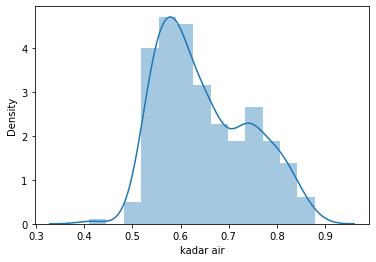

In [571]:
sns.distplot(gandum['kadar air'])

Penjelasan:
Dari normality test shapiro-wilks, didapatkan p-value sebesar 1.9595e-12 yang berada jauh dibawah nilai alpha 0.05 sehingga dapat disimpulkan kolom kadar air tidak berdistribusi normal. Dari histogram pun dapat dilihat bahwa distribusinya tidak berbentuk bell curve 

Keliling
---

In [572]:
df = pd.DataFrame(data = gandum, columns = ['keliling'])
stat, p = s.shapiro(df) #shapiro wilks
print("p = {:g}".format(p))
if p <= alpha:  #jika p value dibawah atau sama dengan alpha, maka tidak berdistribusi normal
    print("Tidak berdistribusi normal")
else:
    print("Berdistribusi normal")

p = 9.72839e-09
Tidak berdistribusi normal


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


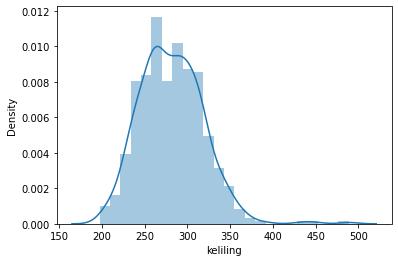

In [573]:
sns.distplot(gandum['keliling'])

Penjelasan: 
Dari normality test shapiro-wilks, didapatkan p-value sebesar 9.72839e-09 yang berada jauh dibawah nilai alpha 0.05 sehingga dapat disimpulkan kolom keliling tidak berdistribusi normal. Dari histogram pun dapat dilihat bahwa distribusinya tidak berbentuk bell curve

Bulatan
---

In [574]:
df = pd.DataFrame(data = gandum, columns = ['bulatan'])
stat, p = s.shapiro(df) #shapiro wilks
print("p = {:g}".format(p))
if p <= alpha:  #jika p value dibawah atau sama dengan alpha, maka tidak berdistribusi normal
    print("Tidak berdistribusi normal")
else:
    print("Berdistribusi normal")

p = 6.89916e-26
Tidak berdistribusi normal


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


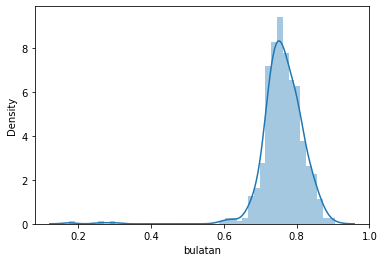

In [575]:
sns.distplot(gandum['bulatan'])

Penjelasan: 
Dari normality test shapiro-wilks, didapatkan p-value sebesar 6.89916e-26 yang berada jauh dibawah nilai alpha 0.05 sehingga dapat disimpulkan kolom bulatan tidak berdistribusi normal. Dari histogram pun dapat dilihat bahwa distribusinya tidak berbentuk bell curve

Ransum
---

In [576]:
df = pd.DataFrame(data = gandum, columns = ['ransum'])
stat, p = s.shapiro(df) #shapiro wilks
print("p = {:g}".format(p))
if p <= alpha:  #jika p value dibawah atau sama dengan alpha, maka tidak berdistribusi normal
    print("Tidak berdistribusi normal")
else:
    print("Berdistribusi normal")

p = 6.24554e-15
Tidak berdistribusi normal


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


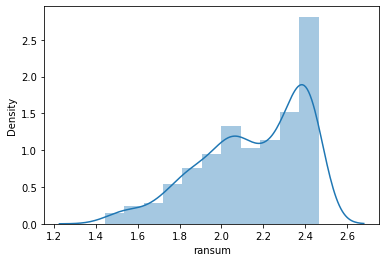

In [577]:
sns.distplot(gandum['ransum'])

Penjelasan:
Dari normality test shapiro-wilks, didapatkan p-value sebesar 6.24554e-15 yang berada jauh dibawah nilai alpha 0.05 sehingga dapat disimpulkan kolom ransum tidak berdistribusi normal. Dari histogram pun dapat dilihat bahwa distribusinya tidak berbentuk bell curve 

# **Test Hipotesis 1 Sampel**


A) Nilai rata-rata Daerah di atas 4700?
---

### Langkah-Langkah
1. Tentukan hipotesis nol 

    H0 : µ = 4700
2. Tentukan hipotesis alternatif

    H1 : µ > 4700
    
3. Tentukan tingkat signifikan 
    
    alpha = 0.05
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
   
   Uji statistik yang digunakan adalah : Uji parameter populasi pengujian rataan satu sampel one tail test variance known
   
   Daerah kritis : z > zalpha : z > 1.645

5. Hitung nilai uji statistik


In [578]:
mean = 4700
rataan = gandum['daerah'].mean()
std = gandum['daerah'].std()
n = gandum['daerah'].count()
z = zscore(rataan, mean, std, n)
p = 1 - ztop(z)
zalpha = ptoz(1-alpha)

print("Nilai z : " +str(z))
print("p-value : " + str(p))

Nilai z : 2.2951538242525173
p-value : 0.010862155196799894


6. Ambil keputusan

In [579]:
if z > zalpha:
  print("Tolak null hypothesis")
  print("Nilai rata-rata Daerah di atas 4700")
else:
  print("Terima null hypothesis")
  print("Nilai rata-rata Daerah tidak dapat dibilang di atas 4700")

Tolak null hypothesis
Nilai rata-rata Daerah di atas 4700


#### Boxplot

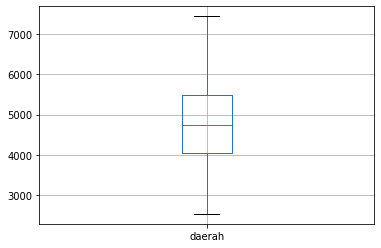

In [580]:
df = pd.DataFrame(data = gandum, columns = ['daerah'])
boxplot = df.boxplot(column = ['daerah'])

B) Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
---

### Langkah-Langkah
1. Tentukan hipotesis nol 

    H0 : µ = 116
2. Tentukan hipotesis alternatif

    H1 : µ != 116 (two-tailed test)
    
3. Tentukan tingkat signifikan 
    
    alpha = 0.05
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
    
    Uji statistik : Uji parameter populasi pengujian rataan satu sampel two tail test variance known

    daerah kritis : z < (-zalpha/2) or z > (zalpha/2): z < -1.96 or z > 1.96
5. Hitung nilai uji statistik

In [581]:
mean = 116
rataan = gandum['sumbu utama'].mean()
std = gandum['sumbu utama'].std()
n = gandum['sumbu utama'].count()
z = zscore(rataan, mean, std, n)
zalpha = ptoz(1-alpha/2)
p = 2*(1-ztop(abs(z)))
print("Nilai z: " + str(z))
print("p-value: " + str(p))

Nilai z: 0.055247123267335795
p-value: 0.9559415872977244


6. Ambil Keputusan

In [582]:
if z < -zalpha or z > zalpha:
  print("Null hypothesis ditolak")
  print("Rata-rata sumbu utama tidak sama dengan 116")
else:
  print("Null hypothesis gagal untuk ditolak")
  print("Rata-rata sumbu utama sama dengan 116")

Null hypothesis gagal untuk ditolak
Rata-rata sumbu utama sama dengan 116


#### Boxplot

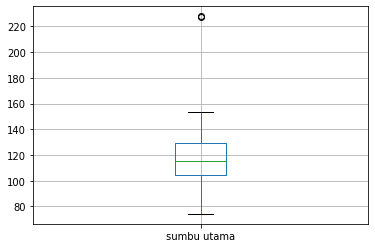

In [583]:
df = pd.DataFrame(data = gandum, columns = ['sumbu utama'])
boxplot = df.boxplot(column = ['sumbu utama'])

C) Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
---

### Langkah-Langkah
1. Tentukan hipotesis nol 

    H0 : µ = 50
2. Tentukan hipotesis alternatif

    H1 : µ != 50 (two-tailed test)
    
3. Tentukan tingkat signifikan 
    
    alpha = 0.05
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
    
    Uji statistik : Uji parameter populasi pengujian rataan satu sampel two tail test variance known

    daerah kritis : z < (-zalpha/2) or z > (zalpha/2): z < -1.96 or z > 1.96
    
5. Hitung nilai uji statistik

In [584]:
mean = 50
sampel = gandum['sumbu kecil'].head(20)
rataan = sampel.mean()
std = sampel.std()
n = sampel.count()
z = zscore(rataan, mean, std, n)
p = 2*(1-ztop(abs(z)))
zalpha = ptoz(1 - alpha/2)
print("Nilai z: " + str(z))
print("p-value : " + str(p))

Nilai z: 6.478168916968886
p-value : 9.284240043427872e-11


6. Ambil Keputusan

In [585]:
if z < -zalpha or z > zalpha:
  print("Null hypothesis ditolak")
  print("Nilai rata-rata 20 baris pertama kolom sumbu kecil bukan 50")
else:
  print("Null hypothesis diterima")
  print("Nilai rata-rata 20 baris pertama kolom sumbu kecil 50")

Null hypothesis ditolak
Nilai rata-rata 20 baris pertama kolom sumbu kecil bukan 50


#### Boxplot

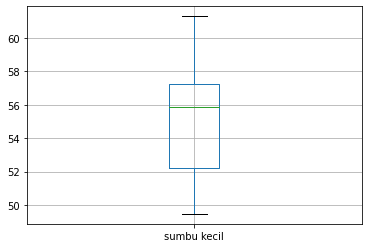

In [586]:
df = pd.DataFrame(data = sampel)
boxplot = df.boxplot()

D) Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?
---

### Langkah-Langkah
1. Tentukan hipotesis nol 

    H0 : p = 0.15
2. Tentukan hipotesis alternatif

    H1 : p != 0.15 (two-tailed test)
    
3. Tentukan tingkat signifikan 
    
    alpha = 0.05
    
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

    Uji statistik : Uji satu parameter populasi  pengujian proporsi satu sampel dengan sample banyak

    Daerah kritis : z > zalpha/2 or z < -zalpha/2: z > 1.96 or z < -1.96
  
5. Hitung nilai statistik

In [587]:
diameter = gandum['diameter'].loc[gandum['diameter'] > 85]
p0 = 0.15 
q0 = 1 - p0
zalpha = ptoz(1 - alpha/2)
n = gandum['diameter'].count()
x = diameter.count()
p1 = x/n

z = (p1-p0) * math.sqrt(n)/ math.sqrt(p0*q0)
p = 2*(1- ztop(abs(z)))

print("Nilai z : " + str(z))
print("p-value : " + str(p))

Nilai z : 2.7553868807746587
p-value : 0.005862277168409591


6. Ambil Keputusan

In [588]:
if z < -zalpha or z > zalpha:
  print("Null hypothesis ditolak")
  print("Proporsi nilai Diameter yang lebih dari 85 tidak sama dengan 15%")
else:
  print("Null hypothesis diterima")
  print("Proporsi nilai diameter yang lebih dari 85 sama dengan 15%")

Null hypothesis ditolak
Proporsi nilai Diameter yang lebih dari 85 tidak sama dengan 15%


#### Boxplot

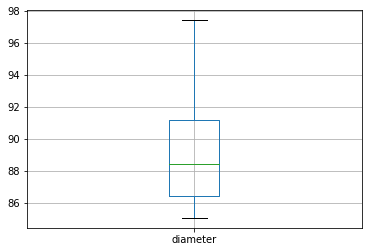

In [589]:
df = pd.DataFrame(data = diameter)
boxplot = df.boxplot()

E) Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?
---

### Langkah-Langkah
1. Tentukan hipotesis nol 

    H0 : p = 0.05
2. Tentukan hipotesis alternatif

    H1 : p < 0.05 (one-tailed test)
    
3. Tentukan tingkat signifikan 
    
    alpha = 0.05
    
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

    Uji statistik : Uji satu parameter populasi pengujian proporsi satu sampel dengan sample banyak one tailed test

    Daerah kritis : z < -zalpha: z < -1.645

5. Hitung nilai uji statistik

In [590]:
keliling = gandum['keliling'].loc[gandum['keliling'] < 100]
p0 = 0.05 
q0 = 1 - p0
zalpha = ptoz(1 - alpha)
n = gandum['keliling'].count()
x = keliling.count()
p1 = x/n
z = (p1-p0) * math.sqrt(n)/ math.sqrt(p0*q0)
p = ztop(z)
print("Nilai z : " + str(z))
print("p-value : " + str(p) )

Nilai z : -5.129891760425771
p-value : 1.4495441414387716e-07


6. Ambil Keputusan

In [591]:
if z < -zalpha:
  print("Null hypothesis ditolak")
  print("Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%")
else:
  print("Null hypothesis diterima")
  print("Proporsi nilai Keliling yang kurang dari 100 tidak kurang dari 5%")

Null hypothesis ditolak
Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%


#### Boxplot

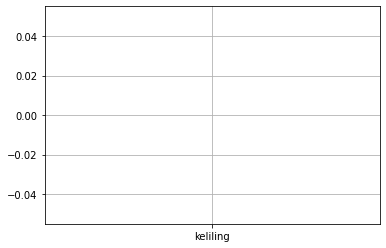

In [592]:
df = pd.DataFrame(data = keliling)
boxplot = df.boxplot()

# **Test Hipotesis 2 Sampel**

A) Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
---

### Langkah-Langkah
1. Tentukan hipotesis nol 

    H0 : µ1 - µ2 = 0
2. Tentukan hipotesis alternatif

    H1 : µ1 - µ2 != 0 (two-tailed)
    
3. Tentukan tingkat signifikan 
    
    alpha = 0.05
    
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

    Uji statistik : two sample two tailed mean test known std

    daerah kritis : z < -zalpha/2 or z > zalpha/2: z < -1.96 or z > 1.96

5. Hitung nilai uji statistik

In [593]:
areaBulat = gandum['area bulatan']

d0 = 0

zalpha = ptoz(1 - alpha/2)
bagian1 = areaBulat.head(areaBulat.size // 2)
bagian2 = areaBulat.tail(areaBulat.size // 2)

mean1 = bagian1.mean()
mean2 = bagian2.mean()

var1 = bagian1.var()
var2 = bagian2.var()
z = ztwotestmean(d0, mean1, mean2, var1, var2, bagian1.size, bagian2.size)
p = 2*(1-ztop(abs(z)))
print("Nilai z : " + str(z))
print("p-value : " + str(p))

Nilai z : 17.013036648485464
p-value : 0.0


6. Ambil Keputusan

In [594]:
if z < -zalpha or z > zalpha:
  print("Null hypothesis ditolak")
  print("Rata-rata kedua bagian tidak sama")
else:
  print("Null hypothesis diterima")
  print("Rata-rata kedua bagian sama")

Null hypothesis ditolak
Rata-rata kedua bagian tidak sama


#### Boxplot Bagian Awal


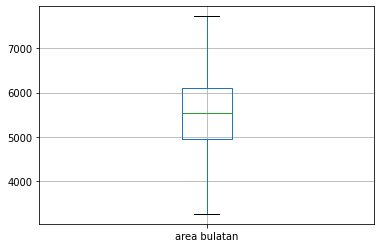

In [595]:
df = pd.DataFrame(data = bagian1)
boxplot = df.boxplot()

#### Boxplot Bagian Akhir

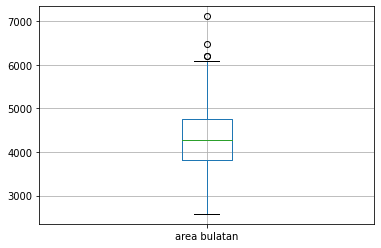

In [596]:
df = pd.DataFrame(data = bagian2)
boxplot = df.boxplot()

B) Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?
---

### Langkah-Langkah
1. Tentukan hipotesis nol 

    H0 : µ1 - µ2 = 0.2
2. Tentukan hipotesis alternatif

    H1 : µ1 - µ2 != 0.2 (two-tailed)
    
3. Tentukan tingkat signifikan 
    
    alpha = 0.05
    
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

    Uji statistik : two sample two tailed mean test known std

    Daerah kritis : z < -zalpha/2 or z > zalpha/2: z < -1.96 or z > 1.96

5. Hitung nilai uji statistik

In [597]:
kadarAir = gandum['kadar air']

d0 = 0.2

zalpha = ptoz(1-alpha/2)
bagian1 = kadarAir.head(kadarAir.size // 2)
bagian2 = kadarAir.tail(kadarAir.size // 2)

mean1 = bagian1.mean()
mean2 = bagian2.mean()

var1 = bagian1.var()
var2 = bagian2.var()

z = ztwotestmean(d0, mean1, mean2, var1, var2, bagian1.size, bagian2.size)
p = 2*(1-ztop(abs(z)))
print("Nilai z : " + str(z))
print("p-value : " + str(p))

Nilai z : -26.903444249744958
p-value : 0.0


6. Ambil Keputusan

In [598]:
if z < -zalpha or z > zalpha:
  print("Null hypothesis ditolak")
  print("Rata-rata bagian awal tidak lebih besar dari pada bagian akhir sebesar 0.2")
else:
  print("Null hypothesis diterima")
  print("Rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2")

Null hypothesis ditolak
Rata-rata bagian awal tidak lebih besar dari pada bagian akhir sebesar 0.2


#### Boxplot Bagian Awal



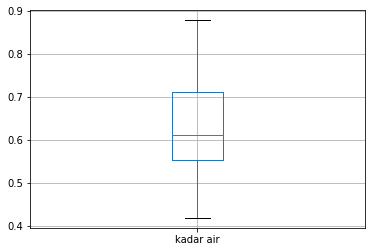

In [599]:
df = pd.DataFrame(data = bagian1)
boxplot = df.boxplot()

#### Boxplot Bagian Akhir



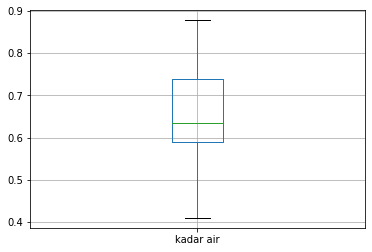

In [600]:
df = pd.DataFrame(data = bagian2)
boxplot = df.boxplot()

C) Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
---

### Langkah-Langkah
1. Tentukan hipotesis nol 

    H0 : µ1 - µ2 = 0
2. Tentukan hipotesis alternatif

    H1 : µ1 - µ2 != 0 (two-tailed)
    
3. Tentukan tingkat signifikan 
    
    alpha = 0.05
    
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

    Uji statistik : two sample two tailed mean test known std

    Daerah kritis : z < -zalpha atau z > zalpha: z < -1.96 or z > 1.96

5. Hitung nilai uji statistik

In [601]:
bulatan = gandum['bulatan']

bagian1 = bulatan.head(20)
bagian2 = bulatan.tail(20)

mean1 = bagian1.mean()
mean2 = bagian2.mean()

var1 = bagian1.var()
var2 = bagian2.var()

d0 = 0

zalpha = ptoz(1 - alpha/2)
z = ztwotestmean(d0, mean1, mean2, var1, var2, bagian1.size, bagian2.size)
p = 2*(1 - ztop(abs(z)))
print("Nilai z : " + str(z))
print("p-value : " + str(p))

Nilai z : -3.3792268633124025
p-value : 0.0007268999745855265


6. Ambil keputusan

In [602]:
if z < -zalpha or z > zalpha:
  print("Null hypothesis ditolak")
  print("Rata-rata 20 baris pertama kolom bulatan tidak sama dengan 20 baris terakhirnya")
else:
  print("Null hypothesis diterima")
  print("Rata-rata 20 baris pertama kolom bulatan sama dengan 20 baris terakhirnya")

Null hypothesis ditolak
Rata-rata 20 baris pertama kolom bulatan tidak sama dengan 20 baris terakhirnya


#### Boxplot 20 Baris Pertama



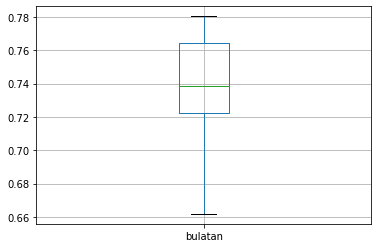

In [603]:
df = pd.DataFrame(data = bagian1)
boxplot = df.boxplot()

#### Boxplot 20 Baris Terakhir



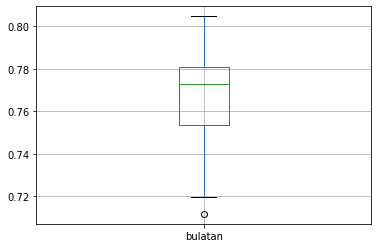

In [604]:
df = pd.DataFrame(data = bagian2)
boxplot = df.boxplot()

D) Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
---

### Langkah-Langkah
1. Tentukan hipotesis nol 

    H0 : p1 - p2 = 0 
2. Tentukan hipotesis alternatif

    H1 : p1 - p2 > 0 (one-tailed)
    
3. Tentukan tingkat signifikan 
    
    alpha = 0.05
    
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

    Uji statistik : Uji statistik satu parameter populasi pengujian proporsi dua sampel one-tailed tes normal, z

    Daerah kritis : z > zalpha: z > 1.645
    
5. Hitung nilai uji statistik

In [605]:
ransum = gandum['ransum']

n1 = ransum.head(ransum.size // 2)
n2 = ransum.tail(ransum.size // 2)


x1 = n1.loc[n1 > 2]
x2 = n2.loc[n2 > 2]

p1 = x1.size/n1.size
p2 = x2.size/n2.size

p = (x1.size + x2.size)/(n1.size + n2.size)
q = 1 - p

zalpha = ptoz(1- alpha)

pembilang = p1 - p2
penyebut = (p*q/n1.size) + (p*q/n2.size)
z = pembilang/math.sqrt(penyebut)
p = 1-ztop(z)
print("Nilai z : " + str(z))
print("p-value : " + str(p))

Nilai z : 13.397486455610238
p-value : 0.0


6. Ambil Keputusan

In [606]:
if z > zalpha:
  print("Null hypothesis ditolak")
  print("Proporsi nilai bagian awal Ransum yang lebih dari 2 lebih besar dari proporsi nilai yang sama di bagian akhir Ransum")
else:
  print("Null hypothesis diterima")
  print("Proporsi nilai bagian awal Ransum yang lebih dari 2 sama dengan proporsi nilai yang sama di bagian akhir Ransum")

Null hypothesis ditolak
Proporsi nilai bagian awal Ransum yang lebih dari 2 lebih besar dari proporsi nilai yang sama di bagian akhir Ransum


#### Boxplot Bagian Awal



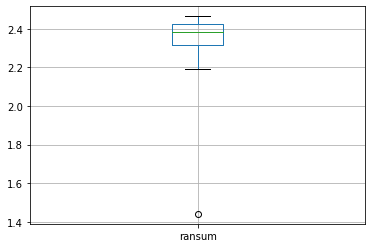

In [607]:
df = pd.DataFrame(data = n1)
boxplot = df.boxplot()

#### Boxplot Bagian Akhir



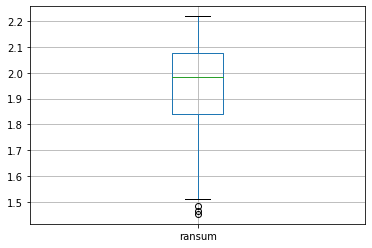

In [608]:
df = pd.DataFrame(data = n2)
boxplot = df.boxplot()

E) Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?
---

### Langkah-Langkah
1. Tentukan hipotesis nol 

    H0 : var1 - var2 = 0
2. Tentukan hipotesis alternatif

    H1 : var1 - var2 != 0 (two-tailed)
    
3. Tentukan tingkat signifikan 
    
    alpha = 0.05
    
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

    Uji statistik : distribusi F

    Daerah kritis : f < (1-alpha/2)f(v1,v2) or f > falpha/2(v1,v2): f < 0.78 or f > 1.28
5. Hitung nilai uji statistik

In [609]:
diameter = gandum['diameter']
awal = diameter.head(diameter.size // 2)
akhir = diameter.tail(diameter.size // 2)
awalvar = awal.var()
akhirvar = akhir.var()
#f  = variansi besar/variansi kecil
if awalvar > akhirvar:
  f = awalvar/akhirvar
else:
  f = akhirvar/awalvar
f1 = s.f.ppf(q=1 - alpha/2, dfn=awal.size-1, dfd=akhir.size-1)
f2 = 1 / (s.f.ppf(q=1 - alpha/2, dfn=akhir.size-1, dfd=awal.size-1))
p = 2*(1-s.f.cdf(f, akhir.size-1, awal.size-1)) #find p-value of F test statistic 
print("Nilai f : " + str(f))
print("p-value : " + str(p))

Nilai f : 1.0838780220421882
p-value : 0.5255791840378787


6. Ambil Keputusan

In [610]:
if(f > f1 or f < f2):
  print("Null hypothesis ditolak")
  print("Bagian awal kolom Diameter tidak memiliki variansi yang sama dengan bagian akhirnya")
else:
  print("Null hypothesis gagal ditolak")
  print("Tidak cukup bukti untuk mengambil kesimpulan bahwa variansi berbeda")

Null hypothesis gagal ditolak
Tidak cukup bukti untuk mengambil kesimpulan bahwa variansi berbeda


#### Boxplot Bagian Awal



In [611]:
df = pd.DataFrame(data = awal)
boxplot = df.boxplot()

#### Boxplot Bagian Akhir


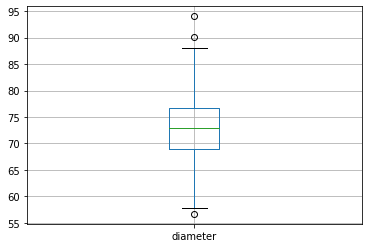

In [612]:
df = pd.DataFrame(data = akhir)
boxplot = df.boxplot()

# **Test Korelasi**

Daerah dengan Kelas
---

Nilai korelasi antara daerah dan kelas: -0.6027466517416661


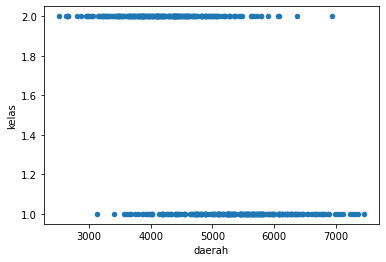

In [613]:
g.plot(kind='scatter', x='daerah', y='kelas')
a = g['daerah']
b = g['kelas']
print("Nilai korelasi antara daerah dan kelas: " + str (a.corr(b)))

### Kesimpulan :
Daerah dan kelas memiliki korelasi yang cukup baik dengan nilai -0.6027. Karena nilai korelasi negatif maka kedua kolom cenderung berbanding terbalik.

Sumbu Utama dengan Kelas
---

Nilai korelasi antara sumbu utama dan kelas: -0.7130906104204592


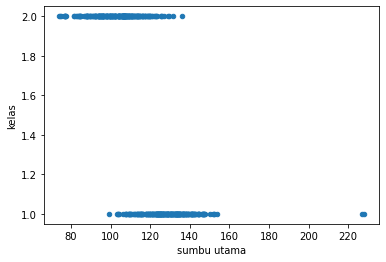

In [614]:
g.plot(kind='scatter', x='sumbu utama', y='kelas')
a = g['sumbu utama']
b = g['kelas']
print("Nilai korelasi antara sumbu utama dan kelas: " + str (a.corr(b)))

### Kesimpulan :
Sumbu utama dan kelas memiliki korelasi yang cukup baik dengan nilai -0.71309. Karena nilai korelasi negatif maka kedua kolom cenderung berbanding terbalik.

Sumbu Kecil dengan Kelas
---

Nilai korelasi antara sumbu kecil dan kelas: -0.1529751733553502


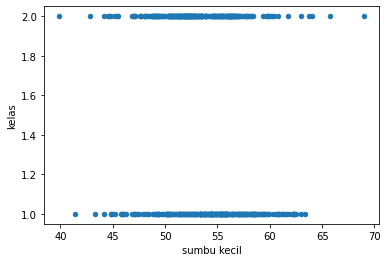

In [615]:
g.plot(kind='scatter', x='sumbu kecil', y='kelas')
a = g['sumbu kecil']
b = g['kelas']
print("Nilai korelasi antara sumbu kecil dan kelas: " + str (a.corr(b)))

### Kesimpulan :
Sumbu kecil dan kelas memiliki korelasi yang buruk dengan nilai -0.1529751.

Keunikan dengan Kelas
---

Nilai korelasi antara keunikan dan kelas: -0.7304563686511923


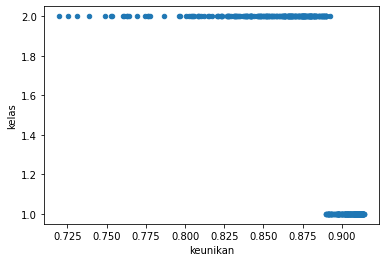

In [616]:
g.plot(kind='scatter', x='keunikan', y='kelas')
a = g['keunikan']
b = g['kelas']
print("Nilai korelasi antara keunikan dan kelas: " + str (a.corr(b)))

### Kesimpulan :
Keunikan dan kelas memiliki korelasi yang cukup baik dengan nilai -0.730456. Karena nilai korelasi negatif maka kedua kolom cenderung berbanding terbalik.

Area Bulatan dengan Kelas
---

Nilai korelasi antara area bulatan dan kelas: -0.6073125434153749


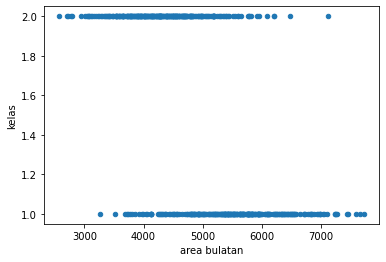

In [617]:
g.plot(kind='scatter', x='area bulatan', y='kelas')
a = g['area bulatan']
b = g['kelas']
print("Nilai korelasi antara area bulatan dan kelas: " + str (a.corr(b)))

### Kesimpulan :
Area bulatan dan kelas memiliki korelasi yang cukup baik dengan nilai -0.607312. Karena nilai korelasi negatif maka kedua kolom cenderung berbanding terbalik.

Diameter dengan Kelas
---

Nilai korelasi antara diameter dan kelas: -0.6025356896618809


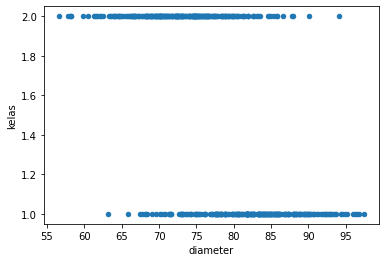

In [618]:
g.plot(kind='scatter', x='diameter', y='kelas')
a = g['diameter']
b = g['kelas']
print("Nilai korelasi antara diameter dan kelas: " + str (a.corr(b)))

### Kesimpulan :
Diameter dan kelas memiliki korelasi yang cukup baik dengan nilai -0.6025356. Karena nilai korelasi negatif maka kedua kolom cenderung berbanding terbalik.


Kadar Air dengan Kelas
---

Nilai korelasi antara kadar air dan kelas: 0.13434422605727642


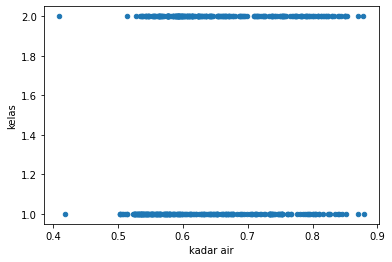

In [619]:
g.plot(kind='scatter', x='kadar air', y='kelas')
a = g['kadar air']
b = g['kelas']
print("Nilai korelasi antara kadar air dan kelas: " + str (a.corr(b)))

### Kesimpulan :
Kadar air dan kelas memiliki korelasi yang buruk dengan nilai 0.134344.

Bulatan dengan Kelas
---

Nilai korelasi antara bulatan dan kelas: 0.5450045317240071


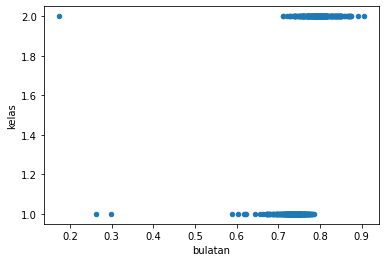

In [620]:
g.plot(kind='scatter', x='bulatan', y='kelas')
a = g['bulatan']
b = g['kelas']
print("Nilai korelasi antara bulatan dan kelas: " + str (a.corr(b)))

### Kesimpulan :
Bulatan dan kelas memiliki korelasi yang cukup baik dengan nilai 0.545. Karena nilai korelasi positif maka kedua kolom cenderung berbanding lurus.

Ransum dengan Kelas
---

Nilai korelasi antara ransum dan kelas: -0.8399038681287484


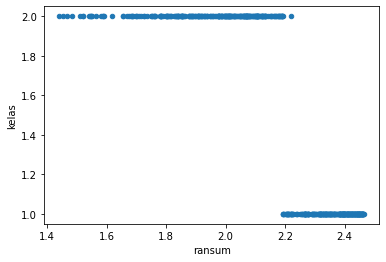

In [621]:
g.plot(kind='scatter', x='ransum', y='kelas')
a = g['ransum']
b = g['kelas']
print("Nilai korelasi antara ransum dan kelas: " + str (a.corr(b)))

### Kesimpulan :
Ransum dan kelas memiliki korelasi yang baik dengan nilai -0.8399. Karena nilai korelasi negatif maka kedua kolom cenderung berbanding terbalik.